##**Bhoopendra kumar**
##**Python  Sales  Analysis**

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

##**Import Data**

In [ ]:
files=os.listdir('/content/drive/MyDrive/machine learning data set/Sales_Data')
print(files)
df_2019=pd.DataFrame()
for f in files:
  print(f)
  df=pd.read_csv('/content/drive/MyDrive/machine learning data set/Sales_Data/'+f)
  df_2019=pd.concat([df_2019,df],ignore_index=True)
  print(df.shape)
  


['Sales_September_2019.csv', 'Sales_April_2019.csv', 'Sales_March_2019.csv', 'Sales_January_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv', 'Sales_November_2019.csv', 'Sales_February_2019.csv', 'Sales_July_2019.csv', 'Sales_October_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv']
Sales_September_2019.csv
(11686, 6)
Sales_April_2019.csv
(18383, 6)
Sales_March_2019.csv
(15226, 6)
Sales_January_2019.csv
(9723, 6)
Sales_May_2019.csv
(16635, 6)
Sales_June_2019.csv
(13622, 6)
Sales_November_2019.csv
(17661, 6)
Sales_February_2019.csv
(12036, 6)
Sales_July_2019.csv
(14371, 6)
Sales_October_2019.csv
(20379, 6)
Sales_August_2019.csv
(12011, 6)
Sales_December_2019.csv
(25117, 6)


In [ ]:
df_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [ ]:
df_2019.shape

(186850, 6)

In [ ]:
df_2019.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
186849,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


##**Clean Up data**

##**Remove Null values rows**

In [ ]:
df_2019.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [ ]:
df_2019[df_2019['Order ID'].isnull()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
198,NaN,NaN,NaN,NaN,NaN,NaN
574,NaN,NaN,NaN,NaN,NaN,NaN
776,NaN,NaN,NaN,NaN,NaN,NaN
1383,NaN,NaN,NaN,NaN,NaN,NaN
1436,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_2019=df_2019[df_2019.notnull().any(axis=1)]

In [ ]:
df_2019.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##**Make every Column with correct data type**

In [ ]:
df_2019.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df_2019['Order Date']=pd.to_datetime(df_2019['Order Date'])

ParserError: ignored

In [ ]:
df_2019=df_2019[df_2019['Order Date']!='Order Date']
df_2019.shape

(185950, 6)

In [ ]:
df_2019[df_2019['Order Date']=='Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
df_2019['Order Date']=pd.to_datetime(df_2019['Order Date'])

In [ ]:
df_2019['Price Each'].head()

0      3.84
1     11.95
2     11.95
3    149.99
4     11.95
Name: Price Each, dtype: object

In [ ]:
df_2019['Price Each']=pd.to_numeric(df_2019['Price Each'])

In [ ]:
df_2019['Quantity Ordered'].head()

0    4
1    2
2    1
3    1
4    1
Name: Quantity Ordered, dtype: object

In [ ]:
df_2019['Quantity Ordered']=pd.to_numeric(df_2019['Quantity Ordered'])

In [ ]:
df_2019.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

##**Data Exploration section**

##**What was the best month for sales? How much was earned that month?**

In [ ]:
'''Totel sales is multiplication of quantity and per piece price'''
df_2019['Sales']=df_2019['Price Each']*df_2019['Quantity Ordered']

In [ ]:
'''Extract month from the order date'''
df_2019['Order Date'].dtype
df_2019['Month']=pd.DatetimeIndex(df_2019['Order Date']).month

In [ ]:
df_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9


In [ ]:
Sales_per_month=df_2019[['Sales','Month']].groupby('Month').sum('Sales').astype('int64')

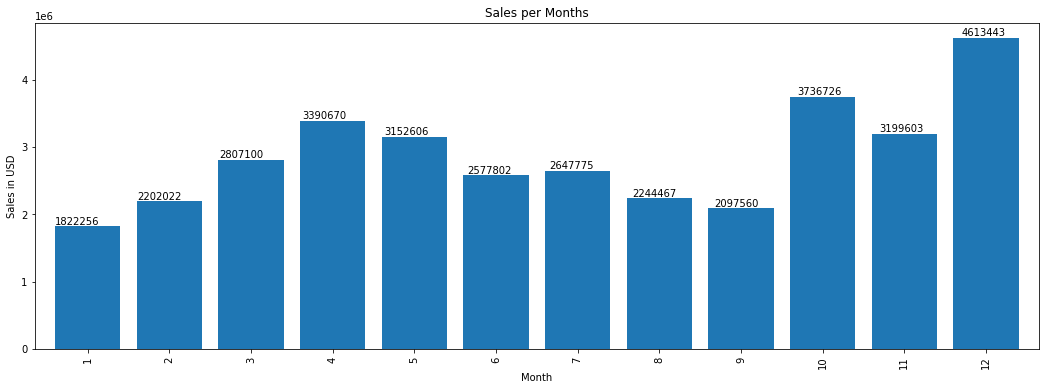

In [ ]:
ax=Sales_per_month.plot(kind='bar',ylabel='Sales in USD',title='Sales per Months',legend=False,figsize=(18,6),width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

##**What city sold the most Product ?**

In [ ]:
temp=df_2019['Purchase Address'].str.split(",", expand = True)
city=temp[1]

In [ ]:
state=temp[2].str.split(' ',expand=True)[1]

In [ ]:
df_2019['City']=city
df_2019['State']=state

In [ ]:
df_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9,Los Angeles,CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9,Austin,TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9,Los Angeles,CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9,Seattle,WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9,Atlanta,GA


In [ ]:
sales_per_city=df_2019[['City','State','Sales']].groupby(['State','City']).sum().astype('int64')

In [ ]:
sales_per_city

Sales
State City                   
CA     Los Angeles    5452570
       San Francisco  8262203
GA     Atlanta        2795498
MA     Boston         3661642
ME     Portland        449758
NY     New York City  4664317
OR     Portland       1870732
TX     Austin         1819581
       Dallas         2767975
WA     Seattle        2747755

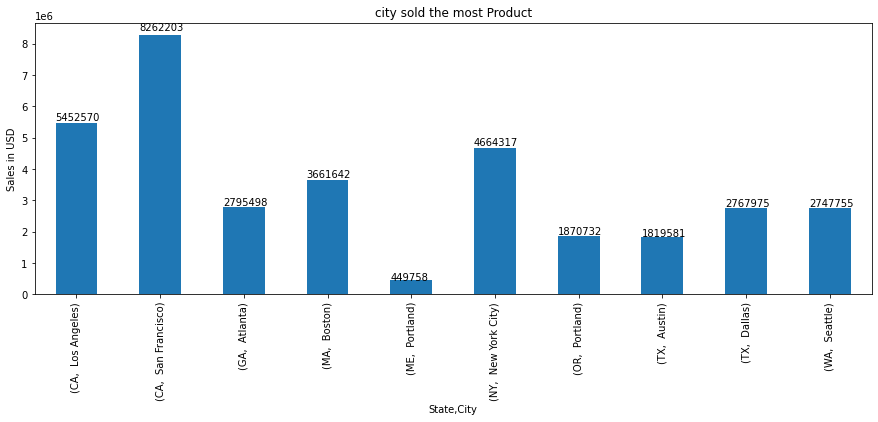

In [ ]:
ax=sales_per_city.plot(figsize=(15,5),kind='bar',legend=False,ylabel='Sales in USD',title='city sold the most Product')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()*1.02 ))


##**What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

In [ ]:
df_2019['Time']=pd.DatetimeIndex(df_2019['Order Date']).time

In [ ]:
df_2019['Hour']=pd.DatetimeIndex(df_2019['Order Date']).hour

In [ ]:
df_2019['Minute']=pd.DatetimeIndex(df_2019['Order Date']).minute

In [ ]:
df_2019['Count']=1

In [ ]:
df_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,State,Time,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9,Los Angeles,CA,14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9,Austin,TX,10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9,Los Angeles,CA,17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9,Seattle,WA,07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9,Atlanta,GA,19:03:00,19,3,1


'my prediction for advertisement is 11am to 7pm'

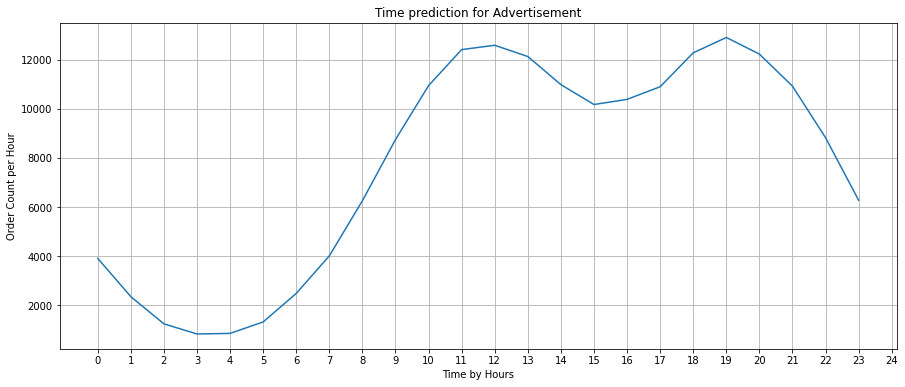

In [ ]:
df_2019[['Hour','Count']].groupby('Hour').sum().plot(figsize=(15,6),kind='line',xticks=np.arange(0,25),legend=False,xlabel='Time by Hours'
,ylabel='Order Count per Hour',title='Time prediction for Advertisement',grid=True)

'''my prediction for advertisement is 11am to 7pm'''

##**What products are most often sold together?**

In [ ]:
df_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,City,State,Time,Hour,Minute,Count
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9,Los Angeles,CA,14:44:00,14,44,1
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9,Austin,TX,10:19:00,10,19,1
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9,Los Angeles,CA,17:48:00,17,48,1
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9,Seattle,WA,07:52:00,7,52,1
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9,Atlanta,GA,19:03:00,19,3,1


In [ ]:
s=df_2019['Order ID'].value_counts()

In [ ]:
repeated = set(s[s > 1].index.values)

In [ ]:
len(repeated)

7136

In [ ]:
df1=df_2019[df_2019['Order ID'].isin(repeated)]

In [ ]:
df1.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Sales', 'Month', 'City', 'State', 'Time', 'Hour',
       'Minute', 'Count'],
      dtype='object')

In [ ]:
df1['Join']=df1[['Order ID','Product']].groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1['Count']=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.groupby('Join')[['Count']].count().sort_values(by='Count',ascending=False).head(20)

,Count
Join,
"iPhone,Lightning Charging Cable",1764
"Google Phone,USB-C Charging Cable",1712
"iPhone,Wired Headphones",722
"Vareebadd Phone,USB-C Charging Cable",624
"Google Phone,Wired Headphones",606
"iPhone,Apple Airpods Headphones",572
"Google Phone,Bose SoundSport Headphones",322
"Google Phone,USB-C Charging Cable,Wired Headphones",231
"Vareebadd Phone,Wired Headphones",208


##**What product sold the most? Why do you think it sold the most?**

In [ ]:
product_count=df_2019[['Product','Count']].groupby('Product').count()
product_count

,Count
Product,
20in Monitor,4101
27in 4K Gaming Monitor,6230
27in FHD Monitor,7507
34in Ultrawide Monitor,6181
AA Batteries (4-pack),20577
AAA Batteries (4-pack),20641
Apple Airpods Headphones,15549
Bose SoundSport Headphones,13325
Flatscreen TV,4800


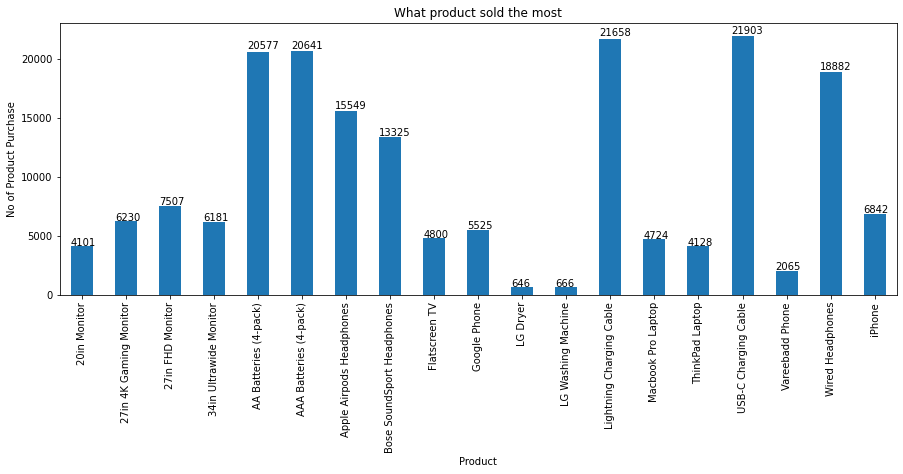

In [ ]:
ax1=product_count.plot(figsize=(15,5),kind='bar',legend=False,ylabel='No of Product Purchase',title='What product sold the most')
for p in ax.patches:
    ax1.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

In [ ]:
product_price=df_2019[['Product','Sales']].groupby('Product').mean()
product_price

,Sales
Product,
20in Monitor,110.740968
27in 4K Gaming Monitor,390.866382
27in FHD Monitor,150.849141
34in Ultrawide Monitor,381.096588
AA Batteries (4-pack),5.157137
AAA Batteries (4-pack),4.493040
Apple Airpods Headphones,151.080455
Bose SoundSport Headphones,100.980520
Flatscreen TV,301.187500


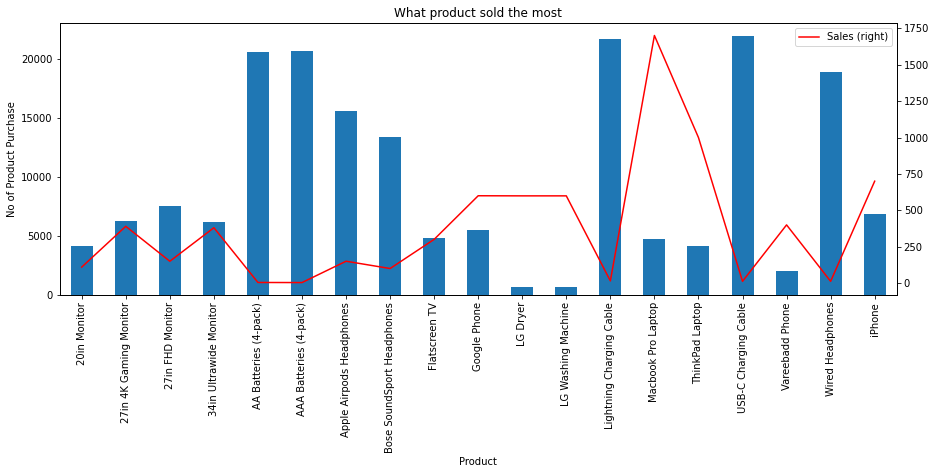

In [ ]:
%matplotlib inline

fig0, ax0 = plt.subplots()
ax1 = ax0.twinx()

product_count.plot(figsize=(15,5),kind='bar',legend=False,ylabel='No of Product Purchase',title='What product sold the most',ax=ax0)
product_price.plot(kind='line', secondary_y=True, ax=ax1,color='r',legend='Price',ylabel='price per product')
plt.show()
plt.close()